<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/HW6P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1, Training loss 26595536404480.0000, Validation loss 24687006449664.0000
Training Time: 0.80234694480896 seconds


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1000, Training loss 19706922663936.0000, Validation loss 17879789469696.0000
Training Time: 2.723726272583008 seconds
Epoch 2000, Training loss 14889954312192.0000, Validation loss 13130955489280.0000
Training Time: 4.743525266647339 seconds
Epoch 3000, Training loss 11529374138368.0000, Validation loss 9827284680704.0000
Training Time: 6.329580307006836 seconds


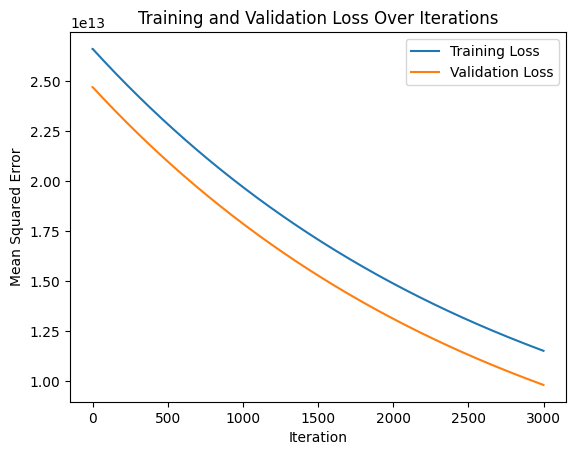

In [5]:
# P1a

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
import time
start_time = time.time()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        t_u_train_device = t_u_train.to(device)
        t_c_train_device = t_c_train.to(device)

        t_p_train = model(t_u_train_device)
        loss_train = loss_fn(t_p_train, t_c_train_device)

        t_u_val_device = t_u_val.to(device)
        t_c_val_device = t_c_val.to(device)

        t_p_val = model(t_u_val_device)
        loss_val = loss_fn(t_p_val, t_c_val_device)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        train_losses.append(loss_train)
        val_losses.append(loss_val)

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            print(f"Training Time: {time.time()-start_time} seconds")

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4th Year Charlotte/IntroToML/Housing.csv'

housing = pd.read_csv(file_path)

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

Y = housing.pop('price')
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']]

X = StandardScaler().fit_transform(X)

Ytarget = pd.DataFrame(Y)

t_c = Y
t_u = X
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_u = t_u.to(torch.float32).to(device)
t_c = t_c.to(torch.float32).to(device)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

train_losses = []
val_losses = []

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear1', nn.Linear(10, 8)),
            ('hidden_activation1', nn.Tanh()),
            ('output_linear', nn.Linear(8,1))
]))

seq_model.to(device)
optimizer = optim.SGD(seq_model.parameters(), lr=1e-5)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

train_losses_cpu = torch.tensor(train_losses).cpu().numpy()
val_losses_cpu = torch.tensor(val_losses).cpu().numpy()

with torch.no_grad():
  plt.plot(train_losses_cpu, label="Training Loss")
  plt.plot(val_losses_cpu, label="Validation Loss")
  plt.xlabel("Iteration")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.title("Training and Validation Loss Over Iterations")
  plt.show()


Using device: cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1, Training loss 26370543452160.0000, Validation loss 25586990841856.0000
Training Time: 0.7107396125793457 seconds


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1000, Training loss 18296694898688.0000, Validation loss 17507076276224.0000
Training Time: 3.1285059452056885 seconds
Epoch 2000, Training loss 13084316925952.0000, Validation loss 12289817182208.0000
Training Time: 5.333857536315918 seconds
Epoch 3000, Training loss 9727526305792.0000, Validation loss 8929110130688.0000
Training Time: 7.886475086212158 seconds


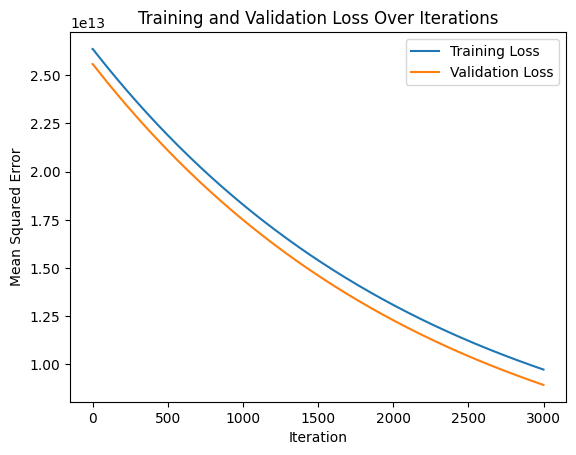

In [6]:
#P1b

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
import time
start_time = time.time()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        t_u_train_device = t_u_train.to(device)
        t_c_train_device = t_c_train.to(device)

        t_p_train = model(t_u_train_device)
        loss_train = loss_fn(t_p_train, t_c_train_device)

        t_u_val_device = t_u_val.to(device)
        t_c_val_device = t_c_val.to(device)

        t_p_val = model(t_u_val_device)
        loss_val = loss_fn(t_p_val, t_c_val_device)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        train_losses.append(loss_train)
        val_losses.append(loss_val)

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            print(f"Training Time: {time.time()-start_time} seconds")

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4th Year Charlotte/IntroToML/Housing.csv'

housing = pd.read_csv(file_path)

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

Y = housing.pop('price')
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']]

X = StandardScaler().fit_transform(X)

Ytarget = pd.DataFrame(Y)

t_c = Y
t_u = X
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_u = t_u.to(torch.float32).to(device)
t_c = t_c.to(torch.float32).to(device)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

train_losses = []
val_losses = []

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear1', nn.Linear(10, 8)),
            ('hidden_activation1', nn.Tanh()),
            ('hidden_linear2', nn.Linear(8,12)),
            ('hidden_activation2', nn.Tanh()),
            ('hidden_linear3', nn.Linear(12, 10)),
            ('hidden_activation3', nn.Tanh()),
            ('output_linear', nn.Linear(10,1))
]))

seq_model.to(device)
optimizer = optim.SGD(seq_model.parameters(), lr=1e-5)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

train_losses_cpu = torch.tensor(train_losses).cpu().numpy()
val_losses_cpu = torch.tensor(val_losses).cpu().numpy()

with torch.no_grad():
  plt.plot(train_losses_cpu, label="Training Loss")
  plt.plot(val_losses_cpu, label="Validation Loss")
  plt.xlabel("Iteration")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.title("Training and Validation Loss Over Iterations")
  plt.show()
